In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import statsmodels.graphics.correlation as sgc
from statsmodels.graphics.gofplots import qqplot
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import OLSInfluence

In [2]:
filename = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"

headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]


df = pd.read_csv(filename, names = headers)

In [3]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [4]:
df.head(3)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500


In [5]:
df.shape

(205, 26)

# Data Cleaning

In [6]:
df = df.loc[:,['symboling', 'wheel-base', 'engine-size', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price']]
df = df.replace("?", np.nan)
df = df.dropna()
df.reset_index(drop=True, inplace=True)
df.head()

,symboling,wheel-base,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,88.6,130,3.47,2.68,9.0,111,5000,21,27,13495
1,3,88.6,130,3.47,2.68,9.0,111,5000,21,27,16500
2,1,94.5,152,2.68,3.47,9.0,154,5000,19,26,16500
3,2,99.8,109,3.19,3.40,10.0,102,5500,24,30,13950
4,2,99.4,136,3.19,3.40,8.0,115,5500,18,22,17450


# Train the model

In [7]:
y= df['price']


x = df[['symboling', 'wheel-base', 'engine-size', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg']]

In [8]:
import statsmodels.api as sm
#x = sm.add_constant(x)

In [9]:
model =sm.OLS(y.astype(float), x.astype(float)).fit()

In [10]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.957
Model:                            OLS   Adj. R-squared (uncentered):              0.955
Method:                 Least Squares   F-statistic:                              416.0
Date:                Mon, 13 May 2024   Prob (F-statistic):                   4.54e-121
Time:                        02:06:22   Log-Likelihood:                         -1850.4
No. Observations:                 195   AIC:                                      3721.
Df Residuals:                     185   BIC:                                      3753.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

# Calculate Cook distance

In [11]:
influence = OLSInfluence(model)
(c, p) = influence.cooks_distance

In [12]:
mean_cooks = influence.cooks_distance

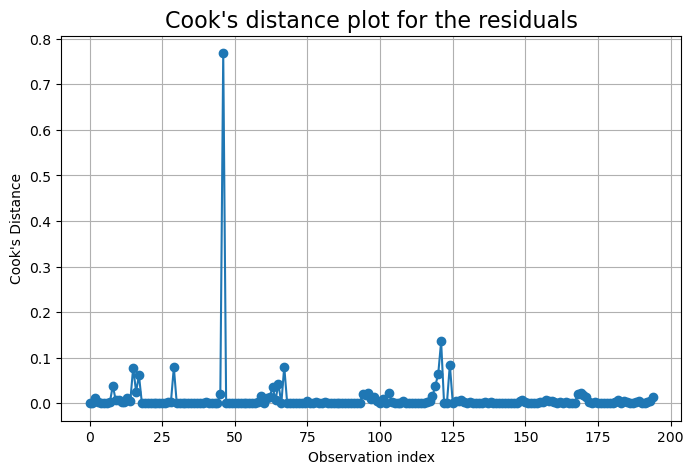

In [13]:
# Plot Cook's distance
plt.figure(figsize=(8, 5))
plt.title("Cook's distance plot for the residuals", fontsize=16)
plt.plot(np.arange(len(c)), c, marker='o', linestyle='-')
plt.xlabel('Observation index')
plt.ylabel("Cook's Distance")
plt.grid(True)
plt.show()

In [14]:
mean_cooks = np.mean(c[0])
mean_cooks

0.0007432592946368323

In [15]:
mean_cooks = np.mean(p[0])
mean_cooks

0.9999999999999934

In [16]:
model.get_influence().cooks_distance

(array([7.43259295e-04, 1.46692410e-03, 1.10140565e-02, 1.65159437e-03,
        1.41598985e-03, 4.50943447e-05, 8.35634677e-04, 2.80954348e-03,
        3.87591926e-02, 6.29425857e-03, 6.63143991e-03, 1.72223175e-03,
        1.95749868e-03, 1.10665450e-02, 4.19330824e-03, 7.80677258e-02,
        2.54839047e-02, 6.08713346e-02, 3.76469686e-04, 6.03419427e-04,
        9.38665313e-05, 1.46370971e-05, 2.02411945e-04, 3.46127802e-05,
        3.05936698e-07, 1.76910179e-04, 3.10812316e-05, 1.63737492e-03,
        3.02525991e-03, 7.85597669e-02, 8.47322467e-05, 7.94871198e-04,
        1.69847397e-04, 1.00772642e-09, 1.76701676e-05, 1.27926808e-05,
        9.16371855e-04, 5.28958525e-05, 1.45548429e-04, 2.47298506e-04,
        2.71086929e-03, 1.84612047e-05, 1.21117757e-03, 1.38641071e-05,
        1.20499573e-03, 2.10772283e-02, 7.68177813e-01, 2.59594156e-04,
        7.28568827e-07, 6.18230409e-05, 4.37922803e-05, 2.76151768e-04,
        2.66040996e-04, 5.47034421e-04, 4.11436500e-05, 4.800629

In [17]:
model.get_influence()